https://unimibfisicalaboratori.github.io/UnimibFisicaLabStatPythonWebBook/lectures/Lecture_12/EXERCISES.html

In [2]:
import iminuit, numpy as np, matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares,ExtendedBinnedNLL
from scipy.stats import norm
from scipy.stats import expon

<h3> Dati

In [3]:
dati = []
with open('dati.txt', 'r') as file:
    for i in file:
        dati.append(float(i))
dati = np.array(dati)

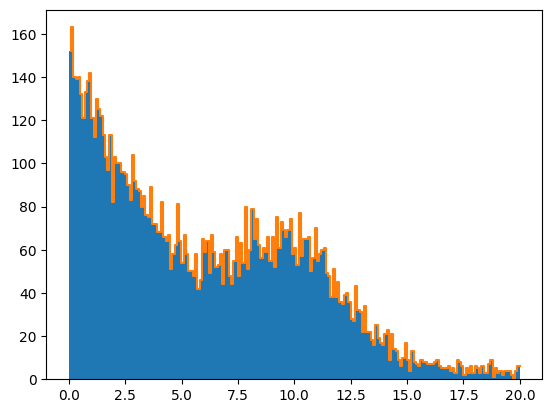

In [4]:
bin_data, bin_edges, patches = plt.hist(dati,bins=200)
plt.step(bin_edges[1:], bin_data)
plt.show()

<h3>Dati Rumore

In [5]:
#filtro dati del rumnore esponenziale
i=0

while bin_edges[i] < 5:
    i+=1
bin_data_noise = bin_data[:i]
bin_edges_noise = bin_edges[:i+1]

while bin_edges[i] < 13:
    i+=1
bin_data_noise = np.append(bin_data_noise,bin_data[i:])
bin_edges_noise = np.append(bin_edges_noise,bin_edges[i+1:])

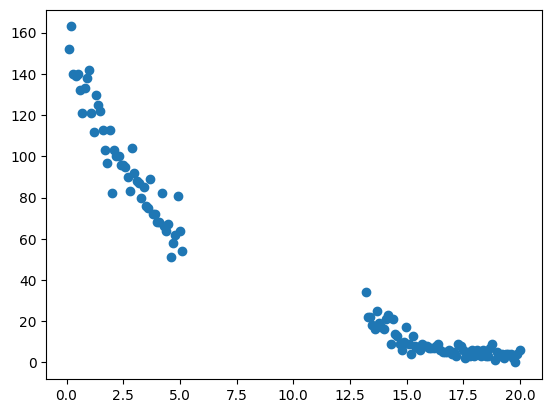

In [6]:
plt.scatter(bin_edges_noise[1:], bin_data_noise)
plt.show()

<h4>Fit functions

In [7]:
def func(x,z,tau,u,sigma,N=10000):
    return N * ( z * expon.cdf(x,0,tau) + (1-z) * norm.cdf(x,u,sigma) )

In [8]:
def func_noise(x,N=10000,tau=0):
    return N * expon.cdf(x,0,tau)

In [9]:
def noise_fit(bin_data,bin_edges,N,tau):
    
    cost = ExtendedBinnedNLL(bin_data,bin_edges,func_noise)
    my_minuit = Minuit(cost,N,tau)
    my_minuit.migrad()
    my_minuit.hesse()
    display(my_minuit)

    return my_minuit

In [10]:
def fit(bin_data,bin_edges,N,z,tau,u,sigma):

    cost = ExtendedBinnedNLL(bin_data,bin_edges,func)
    my_minuit = Minuit(cost,z=z,tau=tau,u=u,sigma=sigma,N=N)
    my_minuit.limits['sigma', 'tau'] = (0, None)  
    my_minuit.migrad()
    my_minuit.hesse()
    display(my_minuit)
    
    return my_minuit

<h3>Fit rumore

In [11]:
noise = noise_fit(bin_data_noise,bin_edges_noise,N=1000,tau=.1)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3300 (χ²/ndof = 28.0)      │              Nfcn = 157              │
│ EDM = 8.88e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N    │  5.61e3   │  0.08e3   │            │            │         │         │       │
│ 1 │ tau  │   3.62    │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────┐
│     │        N      tau │
├─────┼───────────────────┤
│   N │ 5.64e+03   0.0923 │
│ tau │   0.0923  0.00268 │
└─────┴───────────────────┘

In [12]:
print(noise.values)

<ValueView N=5612.59359378548 tau=3.622437191373124>


<h3>Data fit

In [15]:
data = fit(bin_data,bin_edges,N=10000,z=.1,tau=3.5,u=0,sigma=1)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 181 (χ²/ndof = 0.9)        │              Nfcn = 529              │
│ EDM = 7.89e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │   0.772   │   0.011   │            │            │         │         │       │
│ 1 │ tau   │   5.11    │   0.11    │            │            │    0    │         │       │
│ 2 │ u     │   9.97    │   0.08    │            │            │         │         │       │
│ 3 │ sigma │   2.09    │   0.08    │            │            │    0    │         │       │
│ 4 │ N     │  10.16e3  │  0.10e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────┐
│       │         z       tau         u     sigma         N │
├───────┼───────────────────────────────────────────────────┤
│     z │  0.000115   0.86e-3   0.28e-3  -0.60e-3 128.55e-3 │
│   tau │   0.86e-3    0.0129     0.001    -0.005     1.755 │
│     u │   0.28e-3     0.001   0.00622    -0.002     0.175 │
│ sigma │  -0.60e-3    -0.005    -0.002   0.00682    -0.724 │
│     N │ 128.55e-3     1.755     0.175    -0.724  1.06e+04 │
└───────┴───────────────────────────────────────────────────┘